This notebook is used to train the lda model.
It expects parsed data outputed by the preprocess notebook.
The parsed data is loaded in the third code cell.

In [1]:
import datetime

import numpy as np
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

In [2]:
np.random.seed(41 * 41)

In [3]:
%%time
df = pd.read_csv('../data/parsedv5.csv')

CPU times: user 10.6 s, sys: 1.76 s, total: 12.4 s
Wall time: 13 s


In [4]:
MAX_FEATURES = 6000
tf_vectorizer = CountVectorizer(min_df=5, max_df=0.5,
                                max_features=MAX_FEATURES,
                                lowercase=True,
                                token_pattern='[a-z]{3}[a-z]*',
                                stop_words='english')

In [5]:
%%time
dtm = tf_vectorizer.fit_transform(df['text'])
dtm.shape

CPU times: user 50.5 s, sys: 1.25 s, total: 51.7 s
Wall time: 51.9 s


In [6]:
len(tf_vectorizer.vocabulary_)

6000

In [7]:
NUM_TOPICS = 30
lda_model = LatentDirichletAllocation(n_components=NUM_TOPICS,
                                      max_iter=10,
                                      learning_method='online',
                                      verbose = 1,
                                      batch_size=1024,
                                      n_jobs = 7)

In [8]:
%%time
lda_Z = lda_model.fit_transform(dtm)

iteration: 1 of max_iter: 10
iteration: 2 of max_iter: 10
iteration: 3 of max_iter: 10
iteration: 4 of max_iter: 10
iteration: 5 of max_iter: 10
iteration: 6 of max_iter: 10
iteration: 7 of max_iter: 10
iteration: 8 of max_iter: 10
iteration: 9 of max_iter: 10
iteration: 10 of max_iter: 10
CPU times: user 19.3 s, sys: 7.77 s, total: 27.1 s
Wall time: 2min 26s


In [9]:
%%time
doc_topic_dist = lda_model.transform(dtm)

CPU times: user 438 ms, sys: 296 ms, total: 734 ms
Wall time: 10.5 s


In [10]:
viz = pyLDAvis.sklearn.prepare(lda_model, dtm, tf_vectorizer, sort_topics=False)
viz

/usr/local/lib/python3.6/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
0      2.682251        1       1  0.085450  0.070731
1      0.547309        1       2  0.039342 -0.015124
2      4.125218        1       3  0.141614 -0.076416
3      2.303431        1       4  0.033131 -0.026771
4      2.151419        1       5  0.061133  0.047070
5      7.184502        1       6  0.111498 -0.105129
6      2.675117        1       7 -0.100206  0.002956
7      2.573241        1       8  0.160950 -0.056917
8      3.982450        1       9 -0.143017 -0.071070
9      3.192105        1      10 -0.093418 -0.059614
10     4.209169        1      11 -0.110790 -0.069429
11     2.575041        1      12 -0.097786  0.047158
12     2.222744        1      13 -0.074567 -0.063557
13     5.245024        1      14  0.187817  0.000387
14     1.936320        1      15 -0.107319 -0.042594
15     2.675043        1      16 -0.136608  0.135351
16     3.217976        1      17  0.131438 -0.052121
17     6.766039        1      18  0.170759 -0.047189
18     3.492681        1      19  0.037940 -0.092399
19     3.409676        1      20  0.127581  0.015149
20     1.916424        1      21  0.082565  0.124822
21     6.214420        1      22 -0.098865 -0.116027
22     3.747583        1      23  0.073949  0.043038
23     4.368620        1      24 -0.197894 -0.015735
24     4.309841        1      25 -0.174609  0.077732
25     1.034396        1      26 -0.014925  0.094805
26     3.956265        1      27 -0.102639  0.024343
27     2.572490        1      28  0.052327  0.102182
28     2.499767        1      29 -0.082019 -0.090432
29     2.213439        1      30  0.037171  0.214801, topic_info=     Category           Freq         Term          Total  loglift  logprob
term                                                                      
5439  Default   75023.000000          tax   75023.000000  30.0000  30.0000
1052  Default  133567.000000      company  133567.000000  29.0000  29.0000
926   Default   63940.000000         city   63940.000000  28.0000  28.0000
1026  Default   64961.000000   commission   64961.000000  27.0000  27.0000
3174  Default   70856.000000         land   70856.000000  26.0000  26.0000
561   Default   50630.000000         bank   50630.000000  25.0000  25.0000
3940  Default   39374.000000       patent   39374.000000  24.0000  24.0000
4427  Default   51217.000000     railroad   51217.000000  23.0000  23.0000
764   Default   24616.000000   california   24616.000000  22.0000  22.0000
3177  Default   47657.000000        lands   47657.000000  21.0000  21.0000
1286  Default   71485.000000     contract   71485.000000  20.0000  20.0000
648   Default   60704.000000        board   60704.000000  19.0000  19.0000
2274  Default  118432.000000      federal  118432.000000  18.0000  18.0000
3126  Default   65499.000000         jury   65499.000000  17.0000  17.0000
661   Default   29787.000000        bonds   29787.000000  16.0000  16.0000
1447  Default   30584.000000      damages   30584.000000  15.0000  15.0000
1370  Default   50017.000000       county   50017.000000  14.0000  14.0000
1024  Default   46103.000000     commerce   46103.000000  13.0000  13.0000
1345  Default   46446.000000  corporation   46446.000000  12.0000  12.0000
3162  Default   30421.000000        labor   30421.000000  11.0000  11.0000
5241  Default   33895.000000        stock   33895.000000  10.0000  10.0000
2816  Default   23946.000000       income   23946.000000   9.0000   9.0000
2526  Default  100684.000000   government  100684.000000   8.0000   8.0000
1946  Default   26361.000000    employees   26361.000000   7.0000   7.0000
5688  Default   37555.000000        union   37555.000000   6.0000   6.0000
5443  Default   24946.000000        taxes   24946.000000   5.0000   5.0000
3009  Default   30663.000000   interstate   30663.000000   4.0000   4.0000
5540  Default   63844.000000        title   63844.000000   3.0000   3.0000
5611  Defau

In [12]:
lambda_ = 0.5
viz_data = viz.topic_info
viz_data['relevance'] = lambda_ * viz_data['logprob'] + (1 - lambda_) * viz_data['loglift']
words = []
for i in range(NUM_TOPICS):
    viz_df = viz_data[viz_data.Category == 'Topic'+str(i+1)].sort_values(by='relevance', ascending=False).head(3)
    words.append(", ".join(list(viz_df['Term'])))
words

['price, market, competition',
 'california, san, cal',
 'speech, amendment, freedom',
 'indian, treaty, indians',
 'damages, compensation, award',
 'trial, criminal, jury',
 'goods, collector, merchandise',
 'school, religious, schools',
 'land, lands, grant',
 'insurance, negligence, insured',
 'estate, wife, husband',
 'bankruptcy, creditors, lien',
 'patent, invention, machine',
 'agency, benefits, cong',
 'city, ordinance, street',
 'bank, bonds, stock',
 'political, election, race',
 'federal, immunity, respondents',
 'search, military, war',
 'labor, employees, union',
 'securities, trust, corporation',
 'writ, motion, trial',
 'commission, interstate, rates',
 'deed, sale, decree',
 'contract, pay, paid',
 'coal, lease, oil',
 'company, railroad, road',
 'tax, taxes, taxation',
 'vessel, ship, vessels',
 'income, commissioner, taxpayer']

In [13]:
doc_topic_sums = doc_topic_dist.sum(axis=1)
doc_topic_dist = doc_topic_dist / doc_topic_sums[:, np.newaxis]

In [14]:
year_dist = {}
year_cnt = {}
for i in range (len(df)):
    a = df["date"][i]
    yeark = datetime.datetime.strptime(a, "%Y-%m-%d").year
    if yeark in year_dist:
        year_dist[yeark] += doc_topic_dist[i]
        year_cnt[yeark] += 1
    else:
        year_dist[yeark] = doc_topic_dist[i]
        year_cnt[yeark] = 1
        
for key in year_dist:
    year_dist[key] /= year_cnt[key]

In [15]:
plt_years = list(filter(lambda year: 1780 <= year and year <= 2005, sorted(year_dist.keys())))

In [16]:
dist = np.zeros((len(plt_years), NUM_TOPICS))
for i, year in enumerate(plt_years):
    dist[i] = year_dist[year]

CPU times: user 21.4 s, sys: 268 ms, total: 21.7 s
Wall time: 22.3 s


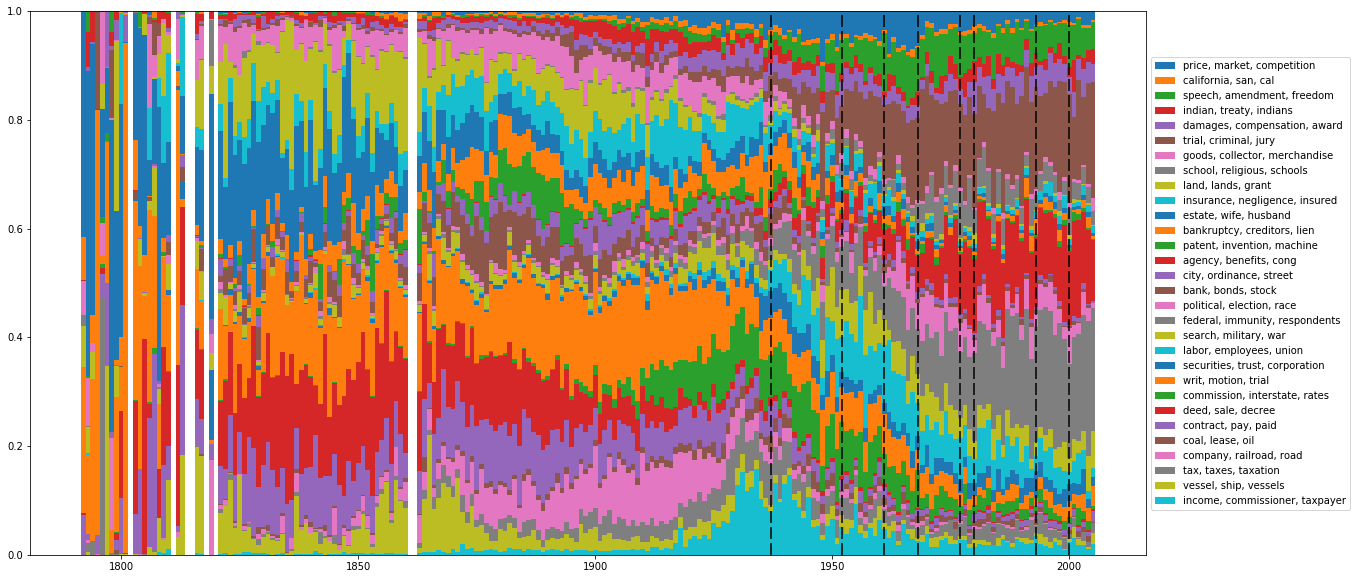

In [17]:
%%time
plt.figure(figsize=(20,10))
bot = np.ones(len(plt_years)) - dist[:, 0]
plt.bar(plt_years, dist[:, 0], width=1, bottom = bot)
for i in range(1, NUM_TOPICS):
    bot -= dist[:, i]
    plt.bar(plt_years, dist[:, i], bottom=bot, width=1)
plt.legend(words, bbox_to_anchor=(1, 0.5), loc="center left")
for i, x in enumerate([1937, 1952, 1961, 1968, 1977, 1980, 1993, 2000]):
    plt.axvline(x=x, dashes=[6, 2], color="black")
plt.savefig('time.png', bbox_inches='tight', dpi=300, transparent=True)

In [18]:
def plot_person(last, low=1700, high=2005):
    warren_dist = {}
    warren_cnt = {}
    for i in range (len(df)):
        if df['last'][i] == last:
            a = df["date"][i]
            yeark = datetime.datetime.strptime(a, "%Y-%m-%d").year
            if yeark in warren_dist:
                warren_dist[yeark] += doc_topic_dist[i]
                warren_cnt[yeark] += 1
            else:
                warren_dist[yeark] = doc_topic_dist[i]
                warren_cnt[yeark] = 1
    for key in warren_dist:
        warren_dist[key] /= warren_cnt[key]
    
    warren_years = list(filter(lambda year: low <= year and year <= high, sorted(warren_dist.keys())))
    
    warren_np = np.zeros((len(warren_years), NUM_TOPICS))
    for i, year in enumerate(warren_years):
        warren_np[i] = warren_dist[year]
        
    plt.figure(figsize=(20,10))
    bot = np.ones(len(warren_years)) - warren_np[:, 0]
    plt.bar(warren_years, warren_np[:, 0], width=1, bottom=bot)
    for i in range(1, NUM_TOPICS):
        bot -= warren_np[:, i]
        plt.bar(warren_years, warren_np[:, i], bottom=bot, width=1)
    #plt.legend(list(range(1, NUM_TOPICS + 1)))

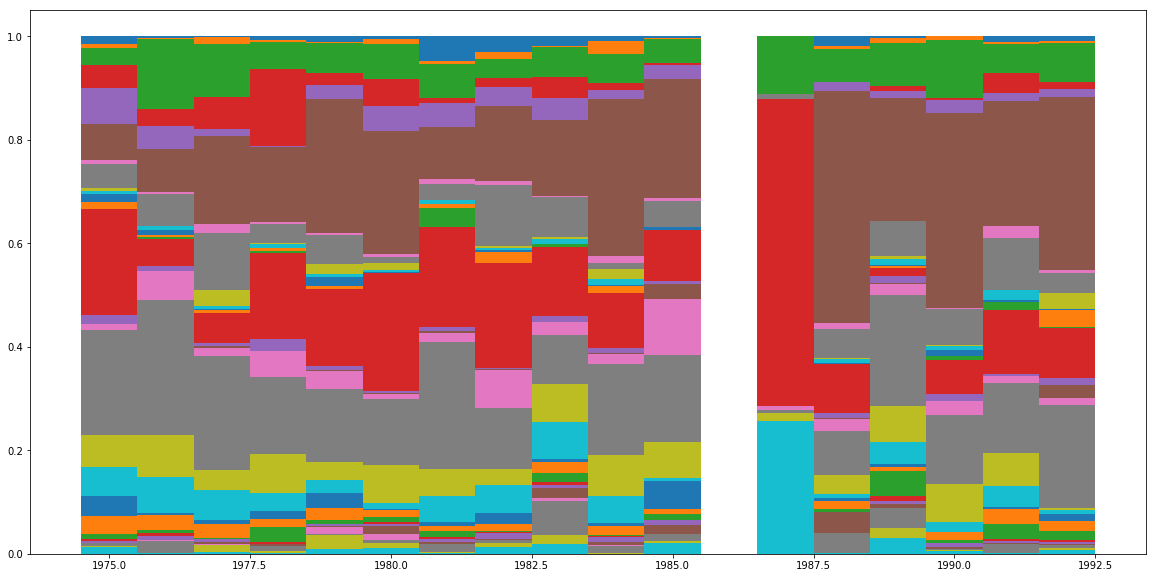

In [19]:
plot_person("Rehnquist", low=1975, high=1992)

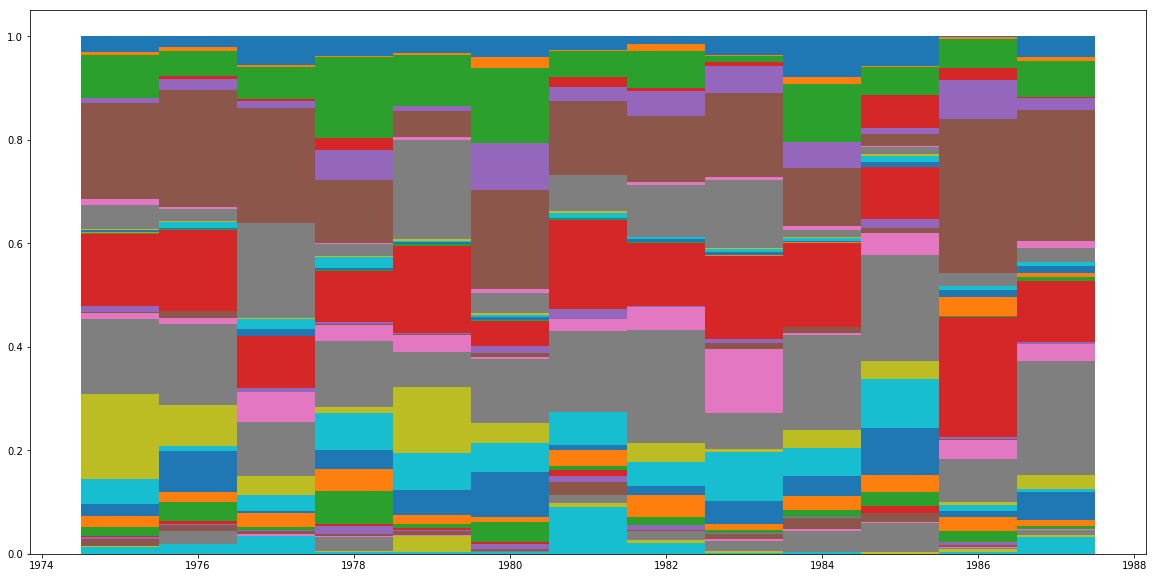

In [20]:
plot_person("Powell", low=1975, high=1992)

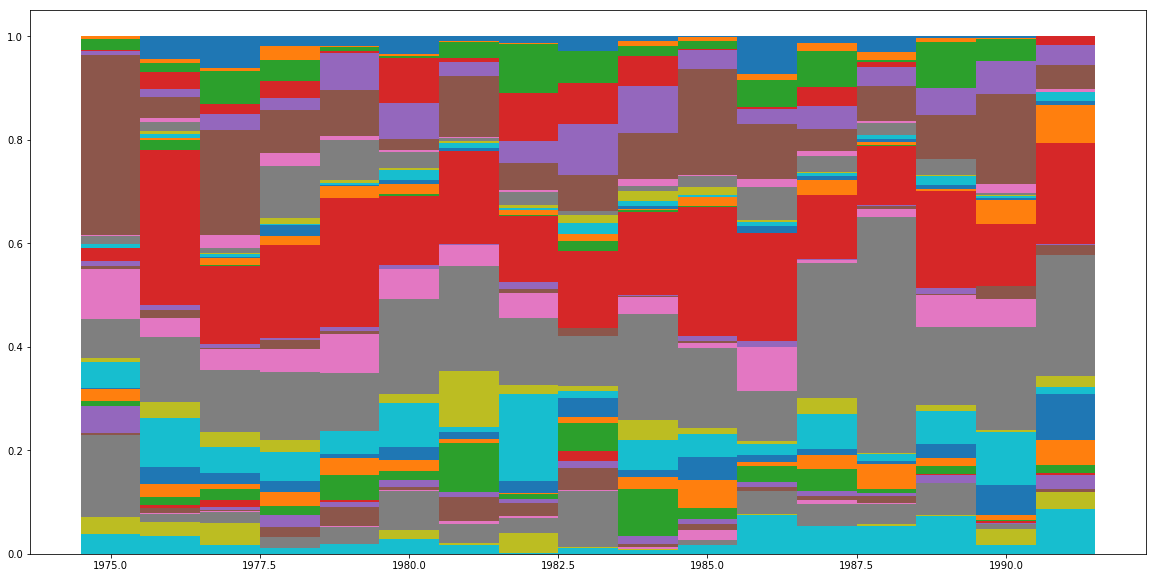

In [21]:
plot_person("Marshall", low=1975, high=1992)